In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import glob

In [9]:
dir_path = 'movielens/'

users = pd.read_csv('{}{}'.format(dir_path, 'users.dat'),header=None, sep='::',\
                           names=['user_id', 'gender', 'age', 'occ', 'zipcode'], engine='python')
print users.head(5)

   user_id gender  age  occ zipcode
0        1      F    1   10   48067
1        2      M   56   16   70072
2        3      M   25   15   55117
3        4      M   45    7   02460
4        5      M   25   20   55455


In [10]:
dir_path = 'movielens/'

movies = pd.read_csv('{}{}'.format(dir_path, 'movies.dat'),header=None, sep='::',\
                           names=['movie_id', 'title', 'genres'], engine='python')
print movies.head(5)

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


In [11]:
dir_path = 'movielens/'

ratings = pd.read_csv('{}{}'.format(dir_path, 'ratings.dat'),header=None, sep='::',\
                           names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python')
print ratings.head(5)

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291


In [5]:
data = pd.merge(pd.merge(ratings, users), movies)
# data.head(10)
# data['genres'].value_counts()
data

user_id  movie_id  rating   timestamp gender  age  occ zipcode  \
0              1      1193       5   978300760      F    1   10   48067   
1              2      1193       5   978298413      M   56   16   70072   
2             12      1193       4   978220179      M   25   12   32793   
3             15      1193       4   978199279      M   25    7   22903   
4             17      1193       5   978158471      M   50    1   95350   
5             18      1193       4   978156168      F   18    3   95825   
6             19      1193       5   982730936      M    1   10   48073   
7             24      1193       5   978136709      F   25    7   10023   
8             28      1193       3   978125194      F   25    1   14607   
9             33      1193       5   978557765      M   45    3   55421   
10            39      1193       5   978043535      M   18    4   61820   
11            42      1193       3   978038981      M   25    8   24502   
12            44      1193       4   978018995      M   45   17   98052   
13            47      1193       4   977978345      M   18    4   94305   
14            48      1193       4   977975061      M   25    4   92107   
15            49      1193       4   978813972      M   18   12   77084   
16            53      1193       5   977946400      M   25    0   96931   
17            54      1193       5   977944039      M   50    1   56723   
18            58      1193       5   977933866      M   25    2   30303   
19            59      1193       4   977934292      F   50    1   55413   
20            62      1193       4   977968584      F   35    3   98105   
21            80      1193       4   977786172      M   56    1   49327   
22            81      1193       5   977785864      F   25    0   60640   
23            88      1193       5   977694161      F   45    1   02476   
24            89      1193       5   977683596      F   56    9   85749   
25            95      1193       5   977626632      M   45    0   98201   
26            96      1193       3   977621789      F   25   16   78028   
27            99      1193       2   982791053      F    1   10   19390   
28           102      1193       5  1040737607      M   35   19   20871   
29           104      1193       2   977546620      M   25   12   00926   
...          ...       ...     ...         ...    ...  ...  ...     ...   
1000179     4933      3084       3   962757020      M   25   15   94040   
1000180     4802      2218       2  1014866656      M   56    1   40601   
1000181     4812      2308       2   962932391      M   18   14   25301   
1000182     4874       624       4   962781918      F   25    4   70808   
1000183     5059      1434       4   962484364      M   45   16   22652   
1000184     5947      1434       4   957190428      F   45   16   97215   
1000185     5077      1868       3   962417299      M   25    2   20037   
1000186     5944      1868       1   957197520      F   18   10   27606   
1000187     5105       404       3   962337582      M   50    7   18977   
1000188     5185       404       4   963402617      F   35    4   44485   
1000189     5532       404       5   959619841      M   25   17   27408   
1000190     5543       404       3   960127592      M   25   17   97401   
1000191     5220      2543       3   961546137      M   25    7   91436   
1000192     5754      2543       4   958272316      F   18    1   60640   
1000193     5227       591       3   961475931      M   18   10   64050   
1000194     5795       591       1   958145253      M   25    1   92688   
1000195     5313      3656       5   960920392      M   56    0   55406   
1000196     5328      2438       4   960838075      F   25    4   91740   
1000197     5334      3323       3   960796159      F   56   13   46140   
1000198     5334       127       1   960795494      F   56   13   46140   
1000199     5334      3382       5   960796159      F   56   13   46140   
1000200     5420      1843       3

In [6]:
# title & ratings
# d1 = data[['title', 'rating']]
# movie_rating = d1['title'].value_counts(ascending=True)

title_no_of_ratings = data.groupby('title').size()
title_no_of_ratings.head(5)
movies_of_interest = title_no_of_ratings[title_no_of_ratings > 500]
movies_of_interest

title
10 Things I Hate About You (1999)                                      700
101 Dalmatians (1961)                                                  565
12 Angry Men (1957)                                                    616
13th Warrior, The (1999)                                               750
20,000 Leagues Under the Sea (1954)                                    575
2001: A Space Odyssey (1968)                                          1716
28 Days (2000)                                                         505
Abyss, The (1989)                                                     1715
Ace Ventura: Pet Detective (1994)                                      766
Addams Family, The (1991)                                              714
Adventures in Babysitting (1987)                                       541
Adventures of Buckaroo Bonzai Across the 8th Dimension, The (1984)     611
African Queen, The (1951)                                             1057
Air Force One (1997

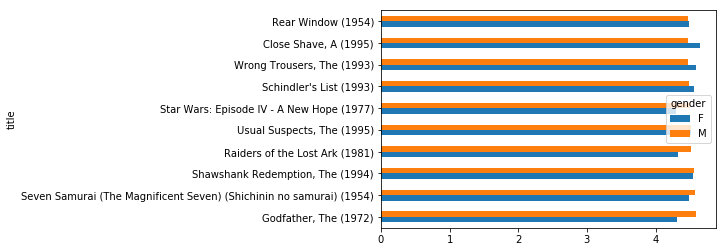

In [7]:
# everymovie mean rating by gender 
'''method 1 
gender_wise_rating_mean = data.groupby(['genres', 'gender']).rating.mean()
gender_wise_rating_mean = gender_wise_rating_mean.unstack()
print gender_wise_rating_mean
'''
# method 2
gender_wise_rating_mean = data.pivot_table('rating', aggfunc='mean', index=['title'], columns='gender')

mean_interest = gender_wise_rating_mean.loc[movies_of_interest.index]
male_interest = mean_interest.sort_values(by='M', ascending=False)
top_10_male_interest = male_interest.head(10)
top_10_male_interest.plot(kind='barh')
plt.show()


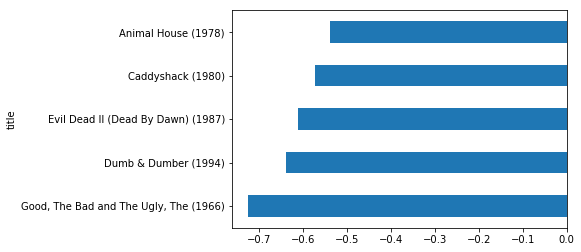

In [8]:
mean_interest['Diff'] = mean_interest['F'] - mean_interest['M']
major_diff_female = mean_interest.sort_values(by='Diff', ascending=True)
major_diff_female.head()['Diff'].plot(kind='barh')
plt.show()